In [1]:
import pyvista as pv
import numpy as np



In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from vtk_smoldyn.generate_data import generate_molecule_coordinates

In [4]:
model_fp = 'models/minE_Andrews_052023/model.txt'
mol_data = np.array(generate_molecule_coordinates(model_fp, 2))

Libsmoldyn notification from smolRunSim: Simulation complete


In [5]:
# create plotter 

p = pv.Plotter(shape=(1, 5))

In [6]:
parameter_vals = np.arange(-1.0, 1.5, 0.5)

In [7]:
for val in parameter_vals:
    spline = pv.KochanekSpline(
        mol_data[:6],
        continuity=[val, val, val],
    )
    p.add_text("c = " + str(val))
    p.add_mesh(spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:6]),
        color="k",
        point_size=10,
        render_points_as_spheres=True
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


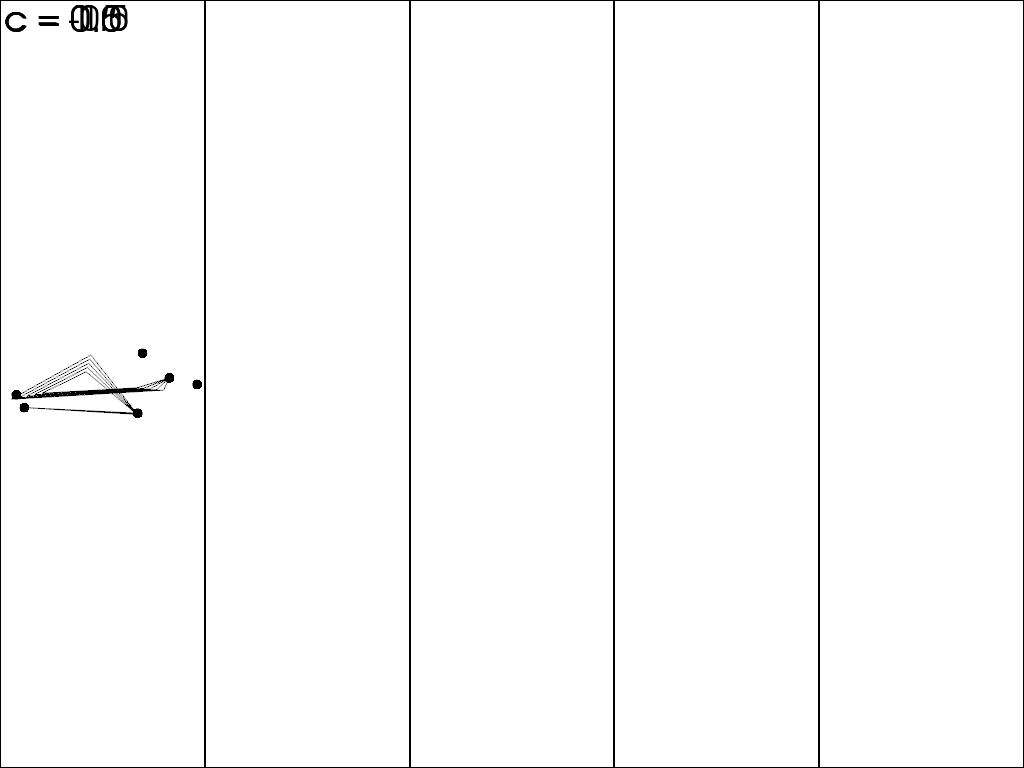

In [8]:
p.show(cpos="xy")

In [9]:
def make_points():
    """Helper to make XYZ points"""
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 6)
    z = np.linspace(-2, 2, 6)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))


points = make_points()

In [10]:
points

array([[ 2.44929360e-15,  5.00000000e+00, -2.00000000e+00],
       [-2.32057790e+00,  7.54001466e-01, -1.20000000e+00],
       [-6.81830893e-01, -9.38459713e-01, -4.00000000e-01],
       [ 6.81830893e-01, -9.38459713e-01,  4.00000000e-01],
       [ 2.32057790e+00,  7.54001466e-01,  1.20000000e+00],
       [-2.44929360e-15,  5.00000000e+00,  2.00000000e+00]])

In [11]:
mol_data

array([[ 1.25018248,  0.09340846, -0.49119737],
       [ 1.65876787, -0.01451408,  0.47390094],
       [-1.32922979, -0.18900231, -0.46290186],
       ...,
       [ 0.14728672, -0.30509238,  0.39612958],
       [ 0.51261817, -0.36674853, -0.33984631],
       [ 0.1381137 ,  0.20106383, -0.45779181]])

In [12]:
p = pv.Plotter(shape=(3, 5))

c = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], continuity=[c[i], c[i], c[i]], n_points=1000)
    p.subplot(0, i)
    p.add_text("c = " + str(c[i]))
    p.add_mesh(kochanek_spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [13]:
t = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:5], tension=[t[i], t[i], t[i]], n_points=1000)
    p.subplot(1, i)
    p.add_text("t = " + str(t[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [14]:
b = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], bias=[b[i], b[i], b[i]], n_points=1000)
    p.subplot(2, i)
    p.add_text("b = " + str(b[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


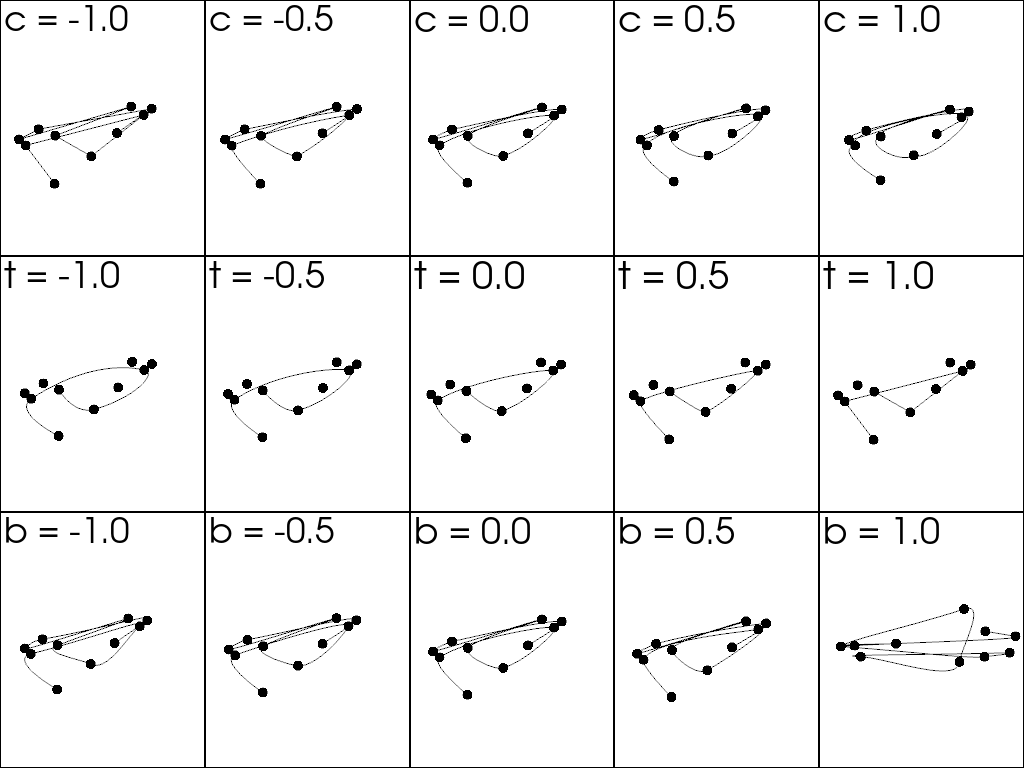

In [15]:
p.show(cpos="xy")

In [16]:
point_cloud = pv.PolyData(mol_data)

In [17]:
point_cloud

PolyData,Information
N Cells,4044861
N Points,4044861
N Strips,0
X Bounds,"-2.000e+00, 2.000e+00"
Y Bounds,"-5.000e-01, 5.000e-01"
Z Bounds,"-5.000e-01, 5.000e-01"
N Arrays,0


In [18]:
np.allclose(mol_data, point_cloud.points)

True

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


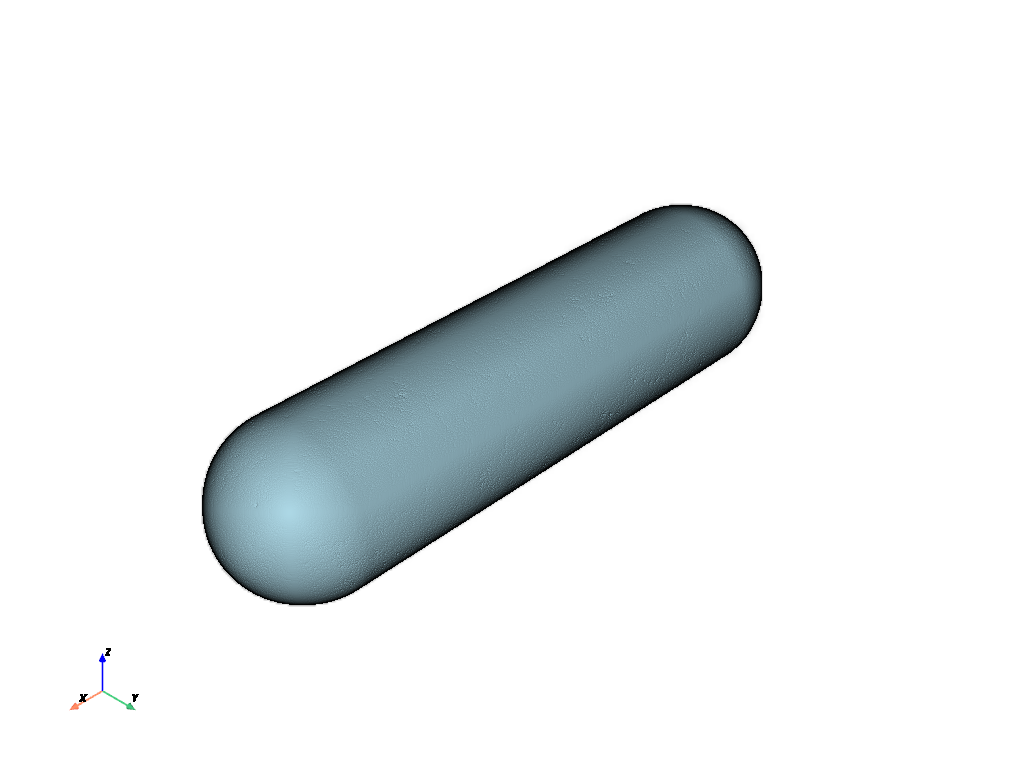

In [19]:
point_cloud.plot(eye_dome_lighting=True)

In [ ]:
crowding_model_fp = 'models/crowding4/model.txt'

crowding_mols = generate_molecule_coordinates(crowding_model_fp, 2)

In [22]:
crowding_point_cloud = pv.PolyData(crowding_mols)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


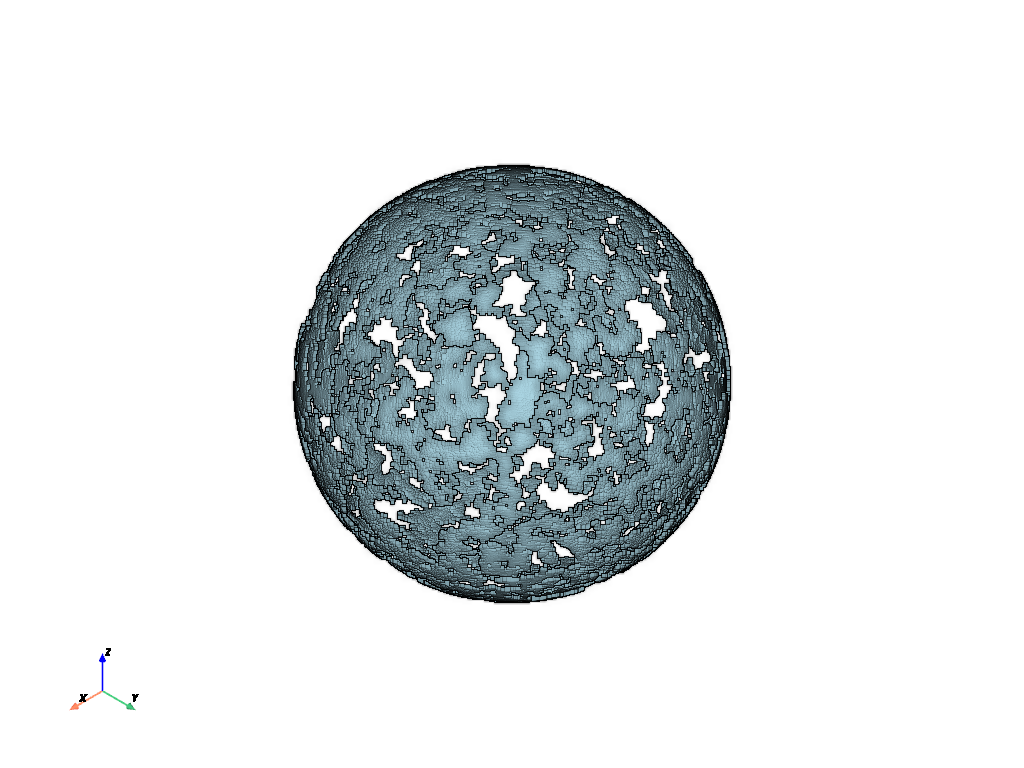

In [23]:
crowding_point_cloud.plot(eye_dome_lighting=True)

In [25]:
crowding_mols


[[5.8332719369044685, 7.01915155398971, 18.58795201373006],
 [5.130111567704516, 3.4157537490558987, 4.261368807466088],
 [3.170131595719477, 13.017128337437232, 16.652054883691495],
 [0.9150045513073586, 9.38799873850751, 14.133801174846898],
 [2.9967941507685394, 3.1021507147606577, 11.837058265655548],
 [12.438703462607217, 13.018037587217467, 19.216516399573656],
 [11.65074257029557, 19.778117186735678, 8.71024294959154],
 [5.563644058144253, 1.7781847446181587, 6.433419023275706],
 [0.7165763196868955, 10.031566615014532, 13.717129042771909],
 [6.555247458831645, 1.2862051475373022, 6.506655012841023],
 [9.601830017690869, 0.3239313168924234, 7.5069786392867055],
 [10.153152557992792, 4.567998861935611, 1.605364336074647],
 [16.346378062415063, 17.676115832492616, 9.105164140720191],
 [14.041234105486836, 1.1076193486386856, 12.143360272083282],
 [9.5109241187062, 18.706844211674095, 14.89404420249491],
 [0.19048154814269758, 8.659034545040685, 11.405403639982783],
 [7.66480902504

In [26]:
z_coords = []
for mol in crowding_mols:
    z_coords.append(mol[-1])
    

[18.58795201373006,
 4.261368807466088,
 16.652054883691495,
 14.133801174846898,
 11.837058265655548,
 19.216516399573656,
 8.71024294959154,
 6.433419023275706,
 13.717129042771909,
 6.506655012841023,
 7.5069786392867055,
 1.605364336074647,
 9.105164140720191,
 12.143360272083282,
 14.89404420249491,
 11.405403639982783,
 2.103495165264116,
 3.7341334074116626,
 4.29016361112943,
 12.804177592695732,
 15.335290775479585,
 5.29025363859028,
 5.95737644609934,
 6.223638631921179,
 4.899094622791532,
 1.9862698861365828,
 8.225923848391028,
 13.147529389976414,
 10.924016970890579,
 1.3214362834862996,
 18.06389711286498,
 15.037846731729303,
 7.953421088856046,
 18.56468548499157,
 9.872223075915182,
 10.789896587559463,
 13.12967156365739,
 16.604351419164878,
 0.302969361725955,
 17.39514375044851,
 11.059263909947887,
 13.54523691198445,
 3.6057288534021286,
 19.39920273595471,
 2.020529793114526,
 16.345605141563716,
 3.385053515291089,
 6.908482901497857,
 12.3718936537327,
 1.4

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


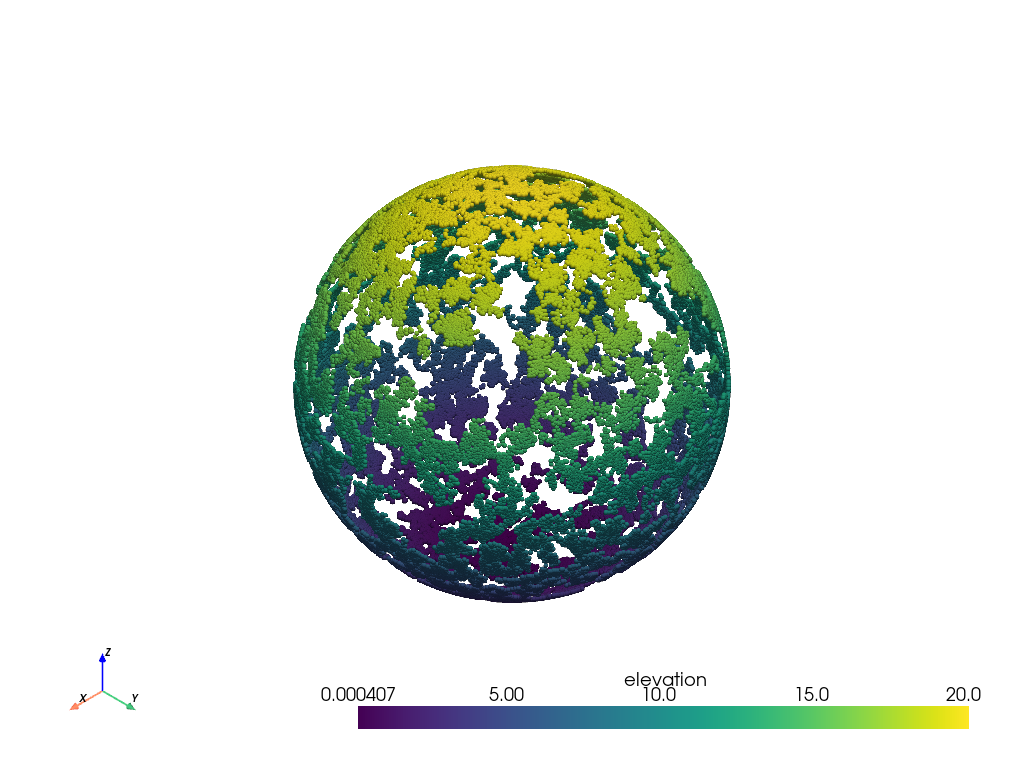

In [28]:
crowding_point_cloud["elevation"] = z_coords
crowding_point_cloud.plot(render_points_as_spheres=True)